# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Accessing dataset

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = df.drop(columns=['User ID', 'Gender']) #keeping it simple with only two features

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Generate plot to visualize

In [5]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [7]:
X0s = X.loc[df['Purchased'] == 0]
X1s = X.loc[df['Purchased'] == 1]

/tmp/ipykernel_778/3320142847.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


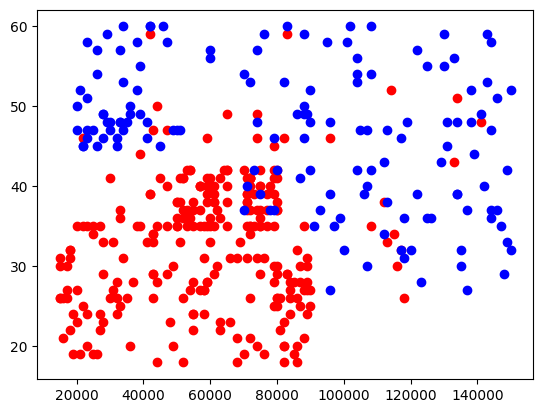

In [8]:
fig, ax = plt.subplots(1,1)
ax.scatter(X0s['EstimatedSalary'], X0s['Age'], color='red')
ax.scatter(X1s['EstimatedSalary'], X1s['Age'], color='blue')
fig.show()

# Building Algorithm

In [ ]:
class MultivariateLogisticRegression:
    def __init__(self, learning_rate:float, epochs:int):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta_vector = np.array([])
    
    def fit(self, features:pd.DataFrame, labels:pd.DataFrame):
        X = features
        Y = labels
        X['x0'] = np.ones((Y.size))
        X = X.loc[:, ['x0', 'EstimatedSalary', 'Age']]

        X = np.array(X)
        Y = np.array(Y)
        Y = Y.reshape((Y.size, 1))

        self.theta_vector = np.zeros((len(list(X.columns)), 1))

        for _ in range(self.epochs):
            line = np.matmul(X, self.theta_vector)

            hypothesis = 1/(1 + np.exp(-line))

            errors = hypothesis - Y

            self.theta_vector = self.theta_vector - (self.learning_rate * np.matmul(X.T, errors))